# HW 2

## **Part A** Insert your answers below and save as a Word document. Show your work. Save the STATA output as an rtf file to be able to include in this document.

Problem 1:
- Calculate the mean and standard deviation for the data below. 
- Construct a stem and leaf plot and comment on the shape of the plot.

Data: 10  50  35  20  11  10  10  20  40  15  20  35  10  22  10  40  10  35  25  30  29  15


In [64]:
import pandas as pd
import numpy as np
import stemgraphic
from scipy.stats import iqr, binom, norm, zscore


In [65]:
data = [10, 50, 35, 20, 11, 10, 10, 20, 40, 15, 20, 35, 10, 22, 10, 40, 10, 35, 25, 30, 29, 15]

In [66]:
np.mean(data)

22.818181818181817

In [67]:
np.std(data)

11.949272947210726

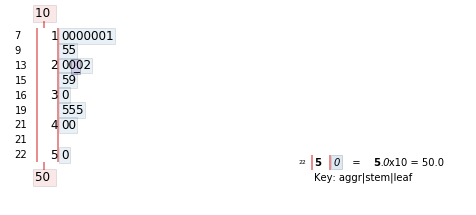

In [68]:
df = pd.Series(data)
fig, ax = stemgraphic.stem_graphic(df, asc=False)

Problem 2: The Excel file RTOG2trials contains patient characteristics of two RTOG randomized trials (study numbers 9003 and 9501) on testing new therapies for advanced head and neck cancer patients. Bring the data into STATA and perform the following analyses:  

2.1 -  For the variables listed below specify if categorical, discrete, or continuous
    - sn = RTOG study number, categorical
    - cn = case number, discrete
    - age = age in years, continuous
    - gender = gender, categorical
    - race = race, categorical
2.2 - Generate summary statistics (mean, std, min, max) on the variable age for all patients  
2.3 - Generate summary statistics (mean, std, min, max) on the variable age by study  
2.4 - Find the 25th 50th and 75th percentiles for age (i.e. find Q1, Q2, Q3) and calculate IQR  
2.5 - Which study has the highest percentage of Native Americans? How about Hispanics? (Hint: create a frequency table for race by study number)  
2.6 - Generate a Boxplot of age by study (represented in one figure)  
2.7 - Generate a histogram of age for all patients, and then histograms of age by study  
2.8 - Describe the age distributions in these two studies based on the summary statistics and graphics  

In [69]:
# load data
df = pd.read_excel('../RTOG2trials Data.xls')

gender_map = {1:'male', 2:'female'}
race_map = {1:'white', 2:'hispanic', 3:'black', 4:'oriental', 6:'native_american', 7:'other'}

df['gender'] = df['gender'].map(gender_map)
df['race'] = df['race'].map(race_map)

In [70]:
# 2.2
df['age'].describe()

count    566.000000
mean      58.826855
std       10.002215
min       30.000000
25%       52.000000
50%       59.000000
75%       66.000000
max       90.000000
Name: age, dtype: float64

In [71]:
# 2.3
df.groupby('sn')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sn,,,,,,,,
9003,424.0,59.945755,9.841985,30.0,53.75,60.0,67.0,90.0
9501,142.0,55.485915,9.761508,31.0,49.00,55.0,63.0,79.0


In [72]:
# 2.4
q1 = df['age'].quantile(.25)
q2 = df['age'].quantile(.5)
q3 = df['age'].quantile(.75)

print(f"25th percentile for Age (Q1): {q1}")
print(f"50th percentile for Age (Q2): {q2}")
print(f"75th percentile for Age (Q3): {q3}")

# iqr = q3 - q1
print(f"IQR: {iqr(df['age'])}")

25th percentile for Age (Q1): 52.0
50th percentile for Age (Q2): 59.0
75th percentile for Age (Q3): 66.0
IQR: 14.0


In [73]:
# 2.5 - higher percent of Native Americans in the 9501 study

# percent of each value count
df.groupby('sn')['race'].value_counts(normalize=True) * 100

sn    race           
9003  white              72.877358
      black              20.047170
      hispanic            5.188679
      oriental            0.943396
      other               0.707547
      native_american     0.235849
9501  white              71.126761
      black              23.239437
      hispanic            4.225352
      native_american     0.704225
      oriental            0.704225
Name: race, dtype: float64

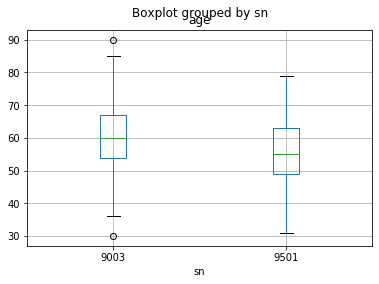

In [74]:
# 2.6 
df.boxplot(column=['age'], by='sn')

Text(0.5, 0, 'Age (years)')

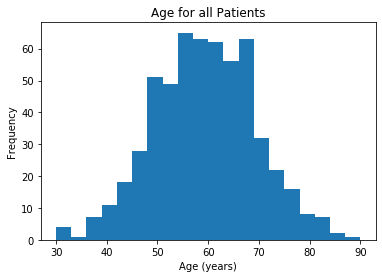

In [75]:
# 2.7

ax = df['age'].plot(kind='hist', title='Age for all Patients', bins=20)
ax.set_xlabel("Age (years)")

Text(0, 0.5, 'Frequency')

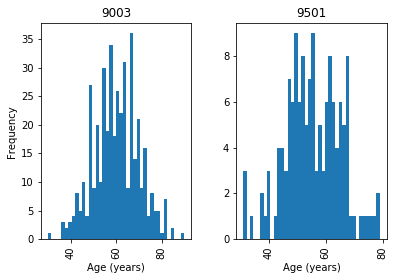

In [76]:
ax_1, ax_2 = df['age'].hist(by=df['sn'], bins=40)
ax_1.set_xlabel("Age (years)")
ax_2.set_xlabel("Age (years)")
ax_1.set_ylabel("Frequency")

**2.8**

Study 9003 can be described as a normal distribution with a mean of 60 years of age and a standard deviation of 9.8.  Study 9501 may be described as a bimodal distribution, suggestion that two groups are present, with a mean of 55.5 years of age and a standard deviation of 9.8.

## **Part B:** Complete the following problems using the methods we learned in class. 

1. A tetrapeptide (a compound consisting of 4 amino acids linked in a chain) has the following amino acid composition: alanine (A), glutamic acid (G), lysine (L), and histidine (H). For example, ALGH and LGHA are two possible chains that can be constructed from these amino acids.  

(a)	Draw a tree diagram to represent the 24 ways in which these amino acids can form a tetrapeptide.

(b)	If each chain is equally likely, what is the probability of finding A at either end of the chain?

(6+2+2+2)/24 = 12/24 = .5

(c)	What is the probability that lysine is not found at either end of the chain?

(4+4+0+4)/24 = 12/24 = .5

2. In guinea pigs, long hair (L) is dominant to short hair (l), and black fur (B) is dominant to albino fur (b). Answer the following questions.

(a) What are the possible genotypes of the offspring of a black haired parent and an albino, and the probability of each genotype?

If considering the fur color alleles (Bb) alone:
- Bb (Black fur): 6/8 = .75
- bb (albino fur):  2/8 = .25
If considering both fur color (Bb) and hair length (Ll) alleles:
- BbLL: .1875
- BbLl: .375
- Bbll: .1875
- bbLL: .0625
- bbLl: .125
- bbll: .0625

(b) If two longhaired parents are mated, what is the probability of a short-haired offspring?

1/16 = .0625


3. Toxicity monitoring is very important for patients receiving cancer treatment and mandatory in clinical trials. For example, breast cancer patients receiving HER2 targeted therapy may have a 10% probability to have cardiac toxicity. Such toxicity is closely monitored. A study will enroll 30 patients with such conditions. 

(a)	Why is this a suitable problem to apply the binomial distribution theory? 

This problem is suitable for the application of the binomial distribution theory because the process here (patients are being provided cancer treatment) is being recorded a specific number of times (n = 30 patients) and the outcome for a given event has just two levels, either success (cardiac toxicity) or failure (no cardiac toxicity).

(b)	What is the probability of observing one patient with a cardiac event among the 30 patients? 

(c)	What is the probability that at least one patients having cardiac events among the 30? 

(d)	What is the probability that at least two patients having cardiac events among the 30? 


In [77]:
# (b) What is the probability of observing one patient with a cardiac event among the 30 patients? 

rv = binom(30,.1)
rv.pmf(1)

0.14130386091738767

In [78]:
# (c) What is the probability that at least one patients having cardiac events among the 30?

1 - rv.pmf(0)

0.9576088417247838

In [79]:
# (d) What is the probability that at least two patients having cardiac events among the 30? 

1 - (rv.pmf(0) + rv.pmf(1))

0.8163049808073961

4. Pagano, page 193 #12: 

According to the Behavioral Risk Factor Surveillance System, 58% of all Americans adhere to a sedentary lifestyle.

(a) If you selected repeated samples of size twelve from the U.S. population, what would be the mean number of individuals per sample who do not exercise regularly? What would be the standard deviation?

(b) Suppose that you select a sample of twelve individuals and find that ten of them do not exercise regularly. Assuming that the Surveillance System is correct, what is the probability that you would have obtained results as bad as or worse than those you observed?

(c) Also explain why the binomial distribution is suitable here. 

This situation is suitable for applying binomial distribution theory because the process (observing if an individuals regularity of exercise) is being reported a specific number of times (n=12) and the outcome is a categorical variable with just two outcomes (success = do NOT exercise regularly, failure = exercise regularly).


In [80]:
# 4a, n=12, p=.58
rv = binom(12,.58)

In [81]:
rv.mean()

6.959999999999999

In [82]:
rv.std()

1.709736821853001

In [83]:
# 4b >=10 individuals with sedentary lifestyle

# sum the probabilities of observing 10, 11, and 12 individuals w/ sedentary lifestyle
rv.pmf(10) + rv.pmf(11) + rv.pmf(12)

0.06419844291214925

5. Pagano, page 194 #18: 

Among females in the United States between 18 and 74 years of age, diastolic blood pressure is normally distributed with mean µ = 77 mm Hg and standard deviation σ = 11.6 mm Hg.  

(a) What is the probability that a randomly selected woman has a diastolic blood pressure less than 60 mm Hg?  
(b) What is the probability that she has a diastolic blood pressure greater than 90 mm Hg?  
(c) What is the probability that she has a diastolic blood pressure between 60 and 90 mm Hg?  
(d) Find the upper and lower bounds of diastolic blood pressure between which 90% of the women find their diastolic blood pressure values.  

In [84]:
# 5a - create normal distrubution, find P(X<60) = .0708
mu = 77
sigma = 11.6

dist = norm(mu,sigma)
# apply cumulative distribution function at 60 mm Hg
dist.cdf(60)

0.0713899259455208

In [85]:
# 5b
1 - dist.cdf(90)

0.13120999355148633

In [86]:
# 5c
(dist.cdf(90)) - dist.cdf(60)

0.7974000805029928

In [87]:
# 5d
dist.interval(.9)

(57.91969792736292, 96.08030207263708)